In [1]:
!pip install praw

You should consider upgrading via the 'c:\users\derek\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install wordcloud

  Using cached certifi-2020.6.20-py2.py3-none-any.whl (156 kB)
  Attempting uninstall: certifi
    Found existing installation: certifi 2019.6.16


ERROR: Cannot uninstall 'certifi'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
You should consider upgrading via the 'c:\users\derek\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install pandas-profiling

  Using cached certifi-2020.6.20-py2.py3-none-any.whl (156 kB)
  Attempting uninstall: certifi
    Found existing installation: certifi 2019.6.16


ERROR: Cannot uninstall 'certifi'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
You should consider upgrading via the 'c:\users\derek\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
import praw
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import requests
import os
from praw.models import MoreComments
import time
import pandas_profiling

reddit = praw.Reddit(
     #client_id="Enter your Client ID",
     #client_secret="Enter your Client Secret",
     #user_agent="Enter your User Agent"
)

In [5]:
print(reddit.read_only)  # Output: True

True


In [6]:
# Define name of subreddit
sub = 'itookapicture'
# Define the name of the directory to be created. Replace with your directory location.
path = 'C:/Users/Derek/desktop/Praw_Submission_Scraper/' + sub
# Define the name of the directory for the CSV file to be stored
path_dir = 'C:/Users/Derek/desktop/Praw_Submission_Scraper/'

In [7]:
subreddit = reddit.subreddit(sub)

# display the subreddit name 
print(subreddit.display_name)

# display the subreddit title 
print(subreddit.title)

# display the subreddit description 
print(subreddit.description)

itookapicture
I Took a Picture: Give and get feedback on photography
> [*Winner's photo*](https://redd.it/j6c3h8 "Photo of the Month - September") **Photo of the Month by /u/pearcechris [Author's Instagram](https://www.instagram.com/allerorts/ "Author's Instagram")**

****

> Interested in flair? [Click here](https://www.reddit.com/r/itookapicture/wiki/flair) to request it.

****
  
# A subreddit about photography techniques and styles.

****

####**[RULES](https://www.reddit.com/r/itookapicture/about/rules/)**
#####(Hover for more info)
####Submissions should be:

###A **photograph** 

> - No paintings, illustrations or heavily altered images.

###A photograph that **you** took 

> - You must be the author of the photos posted. 
> - If you have concerns of plagiarism, please [contact the mod team directly](https://www.reddit.com/message/compose?to=%2Fr%2Fitookapicture&subject=Suspected%20plagiarism&message=Include%20a%20link%20to%20the%20submission%20in%20the%20message!) with proof.



In [8]:
# Sort Submissions by: rising, new, hot, gilded, controversial, top
# Replace 'top' with any of the sorting options from above
# Max limit of 1000 requests
# Estimated time of 9 minutes to run this cell

d = []
for submission in reddit.subreddit(sub).top(limit=100):
    d.append(                                            
        {                                                
            'Title': submission.title,
            'Score': submission.score,
            'Id':  submission.id,
            'Url': submission.url,
            'Author': submission.author,
#            'Comments': submission.comments,
            'Created_utc': submission.created_utc,
            'Original Content': submission.is_original_content,
            'Flair Text': submission.link_flair_text,
            'Full Name': submission.name,
            'Locked': submission.locked,
            'Number of Comments': submission.num_comments,
            'NSFW': submission.over_18,
            'Upvote Percentage': submission.upvote_ratio,
            'Text': submission.selftext
        }
    )

top = pd.DataFrame(d)

In [9]:
top.head()

,Title,Score,Id,Url,Author,Created_utc,Original Content,Flair Text,Full Name,Locked,Number of Comments,NSFW,Upvote Percentage,Text
0,ITAP of “Rush Hour” in Los Angeles during the ...,62316,fmek3i,https://i.redd.it/s28279uvw0o41.jpg,GroundedSpaceMan,1.584795e+09,False,None,t3_fmek3i,True,1049,False,0.96,
1,ITAP of a ship,46512,j4fcv9,https://i.redd.it/531gtosfxvq51.jpg,derryainsworth,1.601733e+09,False,None,t3_j4fcv9,False,373,False,0.96,
2,ITAP of my friend,46162,7t4f5h,https://imgur.com/CvjYQZl,Martinoice,1.516973e+09,False,None,t3_7t4f5h,False,470,False,0.93,
3,"ITAP , only one",39910,6spujl,http://imgur.com/p34x8ns,S1moneyvG,1.502326e+09,False,None,t3_6spujl,False,744,False,0.83,
4,"ITAP of strangers, lovers, and a family",32843,id578h,https://i.redd.it/hm41eym0r3i51.jpg,kmyfrks,1.597905e+09,False,None,t3_id578h,False,259,False,0.96,


In [10]:
# Create date string for csv file name
timestr = time.strftime("%Y%m%d")
print(timestr)

20201031


In [11]:
top.to_csv(path_dir + 'top_' + sub + '_' + timestr + '.csv', index = False)

In [12]:
top.describe()

,Score,Created_utc,Number of Comments,Upvote Percentage
count,100.000000,1.000000e+02,100.000000,100.000000
mean,20103.280000,1.542989e+09,255.600000,0.941900
std,7286.016799,3.657139e+07,147.281631,0.035921
min,14851.000000,1.484969e+09,76.000000,0.730000
25%,15917.750000,1.513689e+09,179.750000,0.930000
50%,17715.000000,1.530383e+09,231.500000,0.950000
75%,20868.000000,1.585606e+09,276.000000,0.960000
max,62316.000000,1.602342e+09,1049.000000,0.990000


In [13]:
# Pandas profile report for profile analysis of top datset
profile = pandas_profiling.ProfileReport(top)
profile

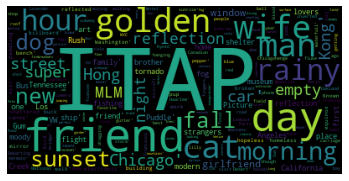

In [14]:
#wordcloud
top_title = top['Title'].values 

wordcloud = WordCloud().generate(str(top_title))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [15]:
# String to be searched in end of string
search = "jpg", "gif", "png"
  
# boolean series returned with False in place of NaN 
bool_series = top["Url"].str.lower().str.endswith(search, na = False) 
  
# displaying filtered dataframe 
top[bool_series] 

,Title,Score,Id,Url,Author,Created_utc,Original Content,Flair Text,Full Name,Locked,Number of Comments,NSFW,Upvote Percentage,Text
0,ITAP of “Rush Hour” in Los Angeles during the ...,62316,fmek3i,https://i.redd.it/s28279uvw0o41.jpg,GroundedSpaceMan,1.584795e+09,False,None,t3_fmek3i,True,1049,False,0.96,
1,ITAP of a ship,46512,j4fcv9,https://i.redd.it/531gtosfxvq51.jpg,derryainsworth,1.601733e+09,False,None,t3_j4fcv9,False,373,False,0.96,
4,"ITAP of strangers, lovers, and a family",32843,id578h,https://i.redd.it/hm41eym0r3i51.jpg,kmyfrks,1.597905e+09,False,None,t3_id578h,False,259,False,0.96,
5,ITAP of a VW Bus reflection,32164,apl1ub,https://i.redd.it/3yxl6dr580g21.jpg,mattjunes,1.549919e+09,False,None,t3_apl1ub,False,264,False,0.95,
6,ITAP of my brother fishing in the fog during t...,29279,90wuz6,https://i.imgur.com/LX143G7.jpg,asria,1.532255e+09,False,None,t3_90wuz6,False,203,False,0.96,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ITAP of my view through a round window.,14893,cp0pjq,https://i.redd.it/1i8sg10k9vf31.jpg,avliswater,1.565550e+09,False,None,t3_cp0pjq,True,154,False,0.97,
96,ITAP testing some new lights,14881,7ncpkd,https://i.redd.it/9t005swxad701.jpg,AmericanChainsaw,1.514774e+09,False,None,t3_7ncpkd,False,219,False,0.93,
97,ITAP of ripples in a pond and flipped it upsid...,14876,j0t8vx,https://i.redd.it/dexo3doznpp51.jpg,brandjohns,1.601221e+09,False,None,t3_j0t8vx,False,124,False,0.97,
98,"ITAP of my girlfriend in the Sacred Valley, Peru",14852,ht7wzh,https://i.redd.it/tk1mchl5nib51.jpg,havefundiscovering,1.595035e+09,False,None,t3_ht7wzh,False,263,False,0.97,


In [16]:
# Create dataframe of boolean filtered series
top_bool = top[bool_series]
# Create list of all URL's of images
image_urls = top_bool['Url'].to_list()
# Create List of all titles of Posts
names = top_bool['Title'].to_list()

In [17]:
# define the access rights
access_rights = 0o755

try:
    os.mkdir(path, access_rights)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s" % path)

Successfully created the directory C:/Users/Derek/desktop/Praw_Submission_Scraper/itookapicture


In [18]:
# Check current working directory.
retval = os.getcwd()
print(("Current working directory %s") % retval)

# Now change the directory
os.chdir( path )

# Check current working directory.
retval = os.getcwd()

print(("Directory changed successfully %s") % retval)

Current working directory C:\Users\Derek\Desktop\reddit-scrapper-master
Directory changed successfully C:\Users\Derek\desktop\Praw_Submission_Scraper\itookapicture


In [19]:
# Download Images to newly created directory

download_images = []

for img in image_urls:
    try:
        # Split the file based upon / and extract the last split within the python list below:
        file_name = img.split('/')[-1]
        print(f"This is the file name: {file_name}")
        # Send a request to the image URL:
        r = requests.get(img, stream=True)
        # Check that the status code is 200 before doing anything else:
        if r.status_code == 200:
            # Allow us to write the data to a file as binary:
            with open(file_name, 'wb') as f:
                for chunk in r:
                    f.write(chunk)
        else:
            # Write all of the images back to the broken_images list:
            download_images.append(img)
    except:
        pass

This is the file name: s28279uvw0o41.jpg
This is the file name: 531gtosfxvq51.jpg
This is the file name: hm41eym0r3i51.jpg
This is the file name: 3yxl6dr580g21.jpg
This is the file name: LX143G7.jpg
This is the file name: sats0joha4x11.jpg
This is the file name: 2ra48lnqjndz.jpg
This is the file name: 2vsnrgfa4pg01.jpg
This is the file name: hg7vvte9xvg01.jpg
This is the file name: hxpI9wt.jpg
This is the file name: ka4nmnnbivo01.jpg
This is the file name: c3w3x2vz6yz41.jpg
This is the file name: 18346189410_88d4c767d8_c.jpg
This is the file name: n0k1h7k1yo251.jpg
This is the file name: x47o6204rrm51.jpg
This is the file name: ta9oyn37swyz.jpg
This is the file name: befw2buh4elz.jpg
This is the file name: 8f197boxwxlz.jpg
This is the file name: 78r3ttko3nnz.jpg
This is the file name: afrmx8krtrv41.jpg
This is the file name: JlnpdV2.jpg
This is the file name: d8wrzkzu6dm31.jpg
This is the file name: vmbkazwc0gd01.jpg
This is the file name: yJ0dE1Y.jpg
This is the file name: 7z1r2v9pcs8